# Factorización de Cholesky

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cholesky(A):
    n = A.shape[0]
    U = np.copy(A) # Cambiar para copiar la mitad superior
    for i in range(n):
        for j in range(i+1, n):
            U[j] = U[j] - U[i]*U[j,i]/U[i,i]
        U[i] = U[i]/np.sqrt(U[i,i])
    return U

In [3]:
A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
U = cholesky(A)
U

array([[ 2. , -0.5,  0.5],
       [ 0. ,  2. ,  1.5],
       [ 0. ,  0. ,  1. ]])

In [4]:
U.T @ U

array([[ 4.  , -1.  ,  1.  ],
       [-1.  ,  4.25,  2.75],
       [ 1.  ,  2.75,  3.5 ]])

### Otra versión

In [5]:
def cholesky_v2(A):
    n = A.shape[0]
    L = np.zeros((n, n))
    for j in range(n):
        for i in range(j, n):
            if i == j:
                L[i, i] = np.sqrt(A[i, i] - np.sum(L[i,:j]**2))
            elif i > j:
                L[i, j] = (1/L[j, j])*(A[i, j] - np.sum(L[i,:j]*L[j,:j]))
    return L

In [6]:
A = np.array([[4., -1., 1.], [-1., 4.25, 2.75], [1., 2.75, 3.5]])
L = cholesky_v2(A)
L

array([[ 2. ,  0. ,  0. ],
       [-0.5,  2. ,  0. ],
       [ 0.5,  1.5,  1. ]])

In [7]:
L @ L.T

array([[ 4.  , -1.  ,  1.  ],
       [-1.  ,  4.25,  2.75],
       [ 1.  ,  2.75,  3.5 ]])

In [8]:
M = 20 # M: Máximo valor de la distribución
A = M*np.random.rand(3,3)
B = A.T @ A
U = cholesky(B)
np.linalg.norm(B - U.T@U)

np.float64(1.8852829216231156e-13)

In [9]:
L = cholesky_v2(B)
np.linalg.norm(B - L@L.T)

np.float64(1.2710574864626038e-13)

In [10]:
errores_v1 = []
enes = list(range(3,301,3))
for n in enes:
    M = 20 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    B = A.T @ A
    U = cholesky(B)
    errores_v1.append(np.linalg.norm(B - U.T@U))

In [11]:
errores_v2 = []
for n in enes:
    M = 20 # M: Máximo valor de la distribución
    A = M*np.random.rand(n,n)
    B = A.T @ A
    L = cholesky_v2(B)
    errores_v2.append(np.linalg.norm(B - L@L.T))

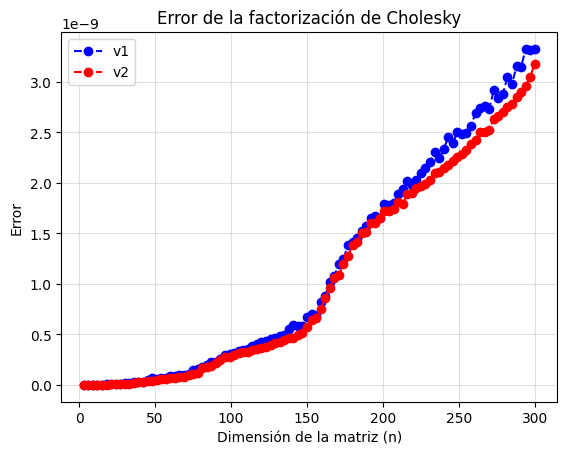

In [12]:
plt.plot(enes, errores_v1, 'b--o', label='v1')
plt.plot(enes, errores_v2, 'r--o', label='v2')
plt.xlabel('Dimensión de la matriz (n)')
plt.ylabel('Error')
plt.title('Error de la factorización de Cholesky')
plt.grid(alpha=0.4)
plt.legend()